Project Question
Text Data Preprocessing for Sentiment Analysis Using NLP Techniques"
Scenario:
- In this project, you are tasked with preparing raw text data for sentiment analysis by applying common NLP (Natural Language Processing) techniques such as Tokenization, Stemming, and Lemmatization. Your goal is to process a dataset of customer reviews to extract useful features that can be used for training a machine learning or deep learning model for sentiment classification.
- The steps will involve cleaning and transforming the raw text into a more structured and analyzable form using these preprocessing techniques. This project will help you understand how to prepare text data for further analysis in tasks like sentiment analysis, text classification, or topic modeling.


Project Steps:
1. Create and Load the Dataset:
- Load the dataset containing customer reviews and sentiment labels (positive or negative).

2. Preprocess the Text:
- Tokenization: Convert the text into a list of tokens (words).
- Stemming: Reduce words to their root form by removing suffixes (e.g., "running" → "run").
- Lemmatization: Convert words to their base or dictionary form (e.g., "better" → "good").
- Remove any unnecessary characters like punctuation and numbers.

3. Prepare Data for Sentiment Classification:
- Use the processed text data to prepare it for model training. This involves converting the text into a format that can be used by machine learning algorithms, such as word embeddings or bag-of-words representation.
	
4. Visualize Preprocessed Data:
- Explore how text data changes before and after preprocessing using visualizations such as word clouds or frequency distributions of words

Expected Output:

Preprocessed Data:
- The raw text data will be transformed into a cleaner, structured form after applying tokenization, stemming, and lemmatization.
- Irrelevant characters (such as punctuation and numbers) will be removed.
- Words will be reduced to their root forms, making the text more consistent and ready for analysis.


Visualizations:
- A WordCloud or frequency distribution of words will be generated, highlighting the most common terms in the dataset, with emphasis on significant words after stopwords removal.
- The WordCloud will show larger words for frequent terms, giving insight into key features of the text data.


Data Representation:
- The preprocessed text will be converted into numerical formats suitable for machine learning, such as a Bag-of-Words or TF-IDF matrix, where each word's occurrence or importance is represented.

In [1]:
import numpy as np
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords

In [2]:
import pandas as pd

df = pd.read_csv("data/sentiment_analysis.csv")
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [3]:
df = df[['text','sentiment']]

In [4]:
df

,text,sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive
2,Don't angry me,negative
3,We attend in the class just for listening teac...,negative
4,"Those who want to go, let them go",negative
...,...,...
494,"According to , a quarter of families under six...",negative
495,the plan to not spend money is not going well,negative
496,uploading all my bamboozle pictures of facebook,neutral
497,congratulations ! you guys finish a month ear...,positive


In [5]:
# NLTK stopwords
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = text.lower() # Convert to lowercase
    words = text.split() # Tokenize text by splitting
    words = [word for word in words if word not in stop_words] 
    return " ".join(words)

# Clean all text
df['cleaned_text'] = df['text'].apply(clean_text)
print(df.head())


                                                text sentiment  \
0              What a great day!!! Looks like dream.  positive   
1     I feel sorry, I miss you here in the sea beach  positive   
2                                     Don't angry me  negative   
3  We attend in the class just for listening teac...  negative   
4                  Those who want to go, let them go  negative   

                                        cleaned_text  
0                     great day!!! looks like dream.  
1                         feel sorry, miss sea beach  
2                                              angry  
3  attend class listening teachers reading slide....  
4                                    want go, let go  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          499 non-null    object
 1   sentiment     499 non-null    object
 2   cleaned_text  499 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [7]:
df = df.drop_duplicates()

In [8]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['cleaned_text'])


X = tokenizer.texts_to_sequences(df['cleaned_text'])


X_pad = pad_sequences(X, padding='post', maxlen=50) 
print(X_pad[:2]) # Show the padded sequences for the first two text

[[ 42   5  55  10 446   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 43  36  33 241 242   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [9]:
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(df["sentiment"])
print(y[:5])  

[2 2 0 0 0]


In [10]:
model = Sequential()

model.add(Embedding(input_dim=10000, output_dim=128, input_length=50))

model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


model.summary()

C:\Users\hp328\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pad, y, test_size=0.2, random_state=41, shuffle=True
)
# Train the model
history = model.fit(
    X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test)
)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 539ms/step - accuracy: 0.3210 - loss: 0.6285 - val_accuracy: 0.3544 - val_loss: 0.2635
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - accuracy: 0.4124 - loss: 0.1272 - val_accuracy: 0.3544 - val_loss: -0.3391
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.4109 - loss: -0.3933 - val_accuracy: 0.3544 - val_loss: -0.5702
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - accuracy: 0.4072 - loss: -0.2818 - val_accuracy: 0.3544 - val_loss: -0.7375
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.4068 - loss: -0.4952 - val_accuracy: 0.3544 - val_loss: -0.9212


In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3452 - loss: -0.8585
Test Loss: -0.921151876449585
Test Accuracy: 0.3544303774833679


In [13]:
new_text = ["I really enjoyed the movie, it was fantastic!"]

# Preprocess and predict
new_text_cleaned = [clean_text(text) for text in new_text]
new_text_seq = tokenizer.texts_to_sequences(new_text_cleaned)
new_text_pad = pad_sequences(new_text_seq, padding="post", maxlen=50)

# Predict the sentiment (0 = Negative, 1 = Positive)
prediction = model.predict(new_text_pad)
print("Predicted Sentiment:", "Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
Predicted Sentiment: Positive


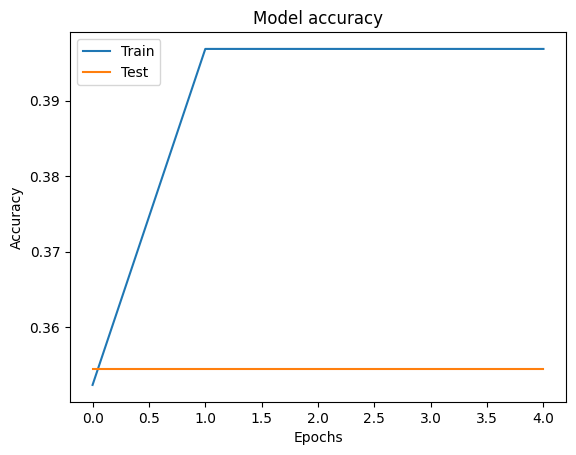

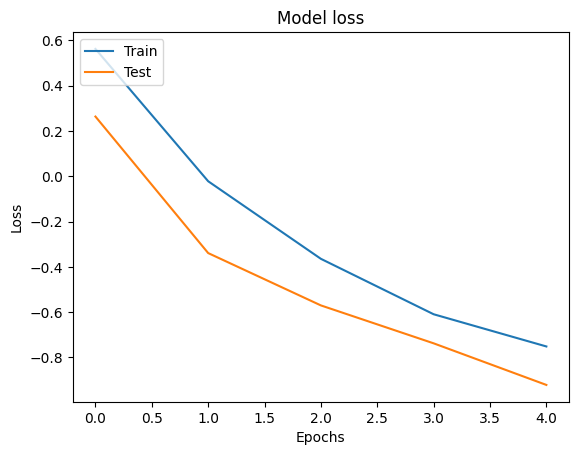

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()